In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/content/drive/My Drive/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [25]:
df['comment_count'] = df['posts'].str.count(pat=r"\|\|\|")+1
df['words'] = df['posts'].apply(lambda x: len(x.split()))
df


,type,posts,comment_count,words
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,556
1,ENTP,'I'm finding the lack of me in these posts ver...,50,1170
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,836
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,1064
4,ENTJ,'You're fired.|||That's another silly misconce...,50,967
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,50,796
8671,ENFP,'So...if this thread already exists someplace ...,50,1309
8672,INTP,'So many questions when i do these things. I ...,50,948
8673,INFP,'I am very conflicted right now when it comes ...,50,1705


In [26]:
df['words/comment'] = df['words']/df['comment_count']
df

,type,posts,comment_count,words,words/comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,556,11.12
1,ENTP,'I'm finding the lack of me in these posts ver...,50,1170,23.40
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,836,16.72
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,1064,21.28
4,ENTJ,'You're fired.|||That's another silly misconce...,50,967,19.34
...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,50,796,15.92
8671,ENFP,'So...if this thread already exists someplace ...,50,1309,26.18
8672,INTP,'So many questions when i do these things. I ...,50,948,18.96
8673,INFP,'I am very conflicted right now when it comes ...,50,1705,34.10


In [27]:
cnt_srs = df['type'].value_counts()
cnt_srs

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [28]:
mean_each=df.groupby('type').agg({'words/comment': 'mean'})
mean_each

,words/comment
type,
ENFJ,26.272646
ENFP,25.990247
ENTJ,24.952730
ENTP,24.536923
ESFJ,26.711806
ESFP,22.190754
ESTJ,24.967319
ESTP,23.770516
INFJ,26.064050


In [29]:
sorted_mean = mean_each.sort_values(by='words/comment')
sorted_mean.index

Index(['ESFP', 'ISFP', 'ESTP', 'ISTP', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ESTJ',
       'ISTJ', 'ISFJ', 'INFP', 'ENFP', 'INFJ', 'ENFJ', 'ESFJ'],
      dtype='object', name='type')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you

Text(0.5, 1.0, 'Words/Comment for Each Personality')

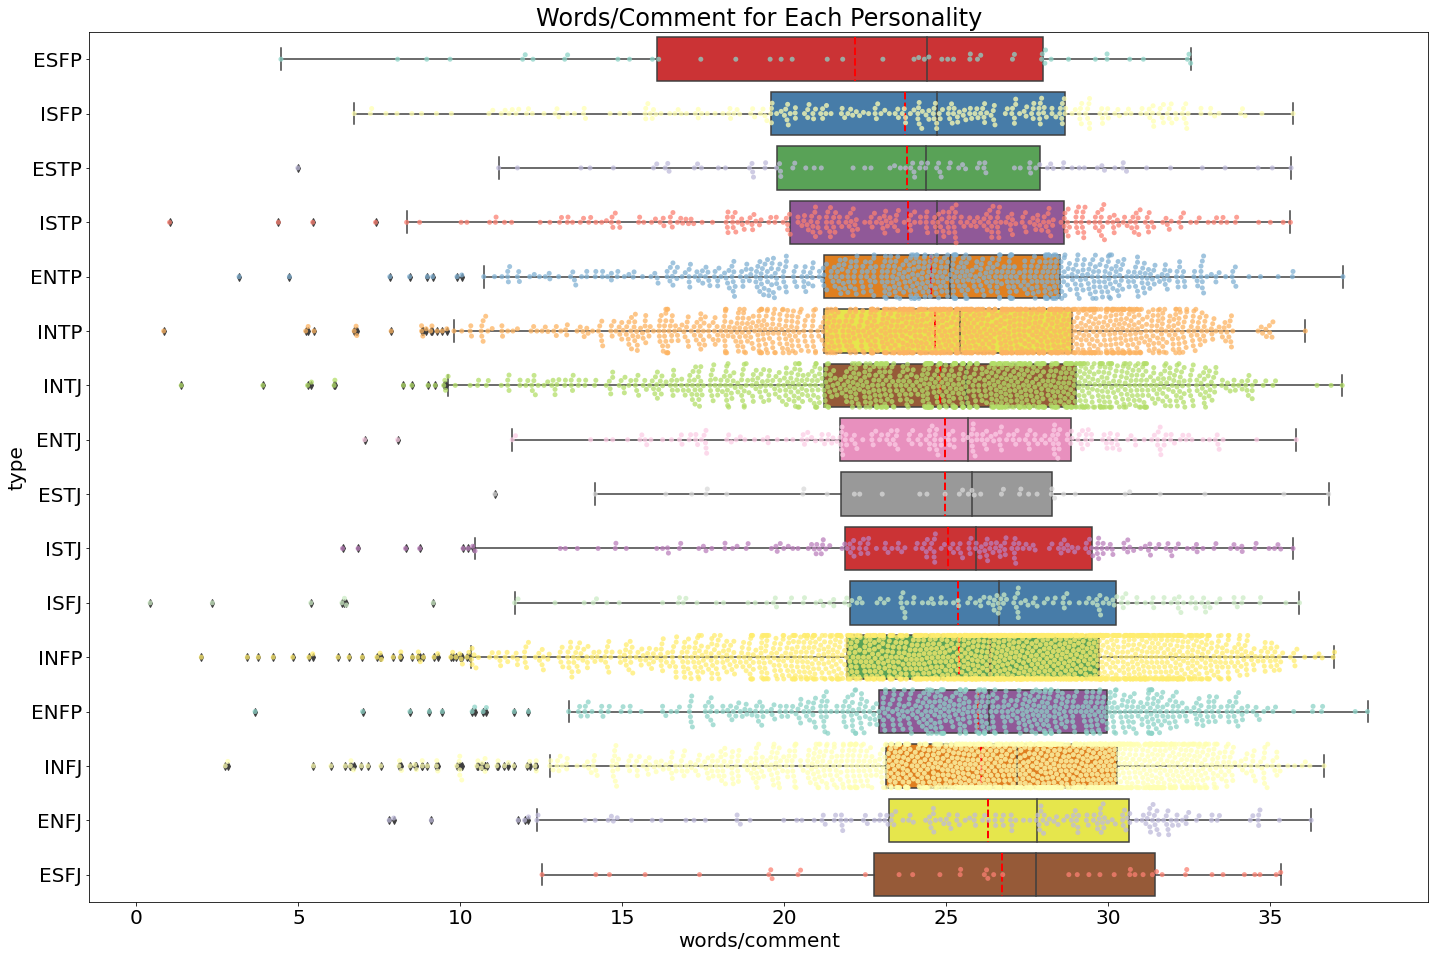

In [30]:
plt.figure(figsize=(24,16))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('axes', labelsize=20) 
plt.rc('axes', titlesize=20) 
plt.rc('legend', fontsize=20)
sns.boxplot(y='type', x='words/comment', data=df, palette='Set1',showmeans=True, meanline=True,  meanprops={'linestyle':'--','color':'red','linewidth':2},
            order=sorted_mean.index,)
sns.swarmplot(y='type', x='words/comment', data=df, alpha=0.75,palette='Set3',order=sorted_mean.index,).set_title('Words/Comment for Each Personality',fontsize=24)

Text(0.5, 1.0, 'Words/Comment for Each Personality')

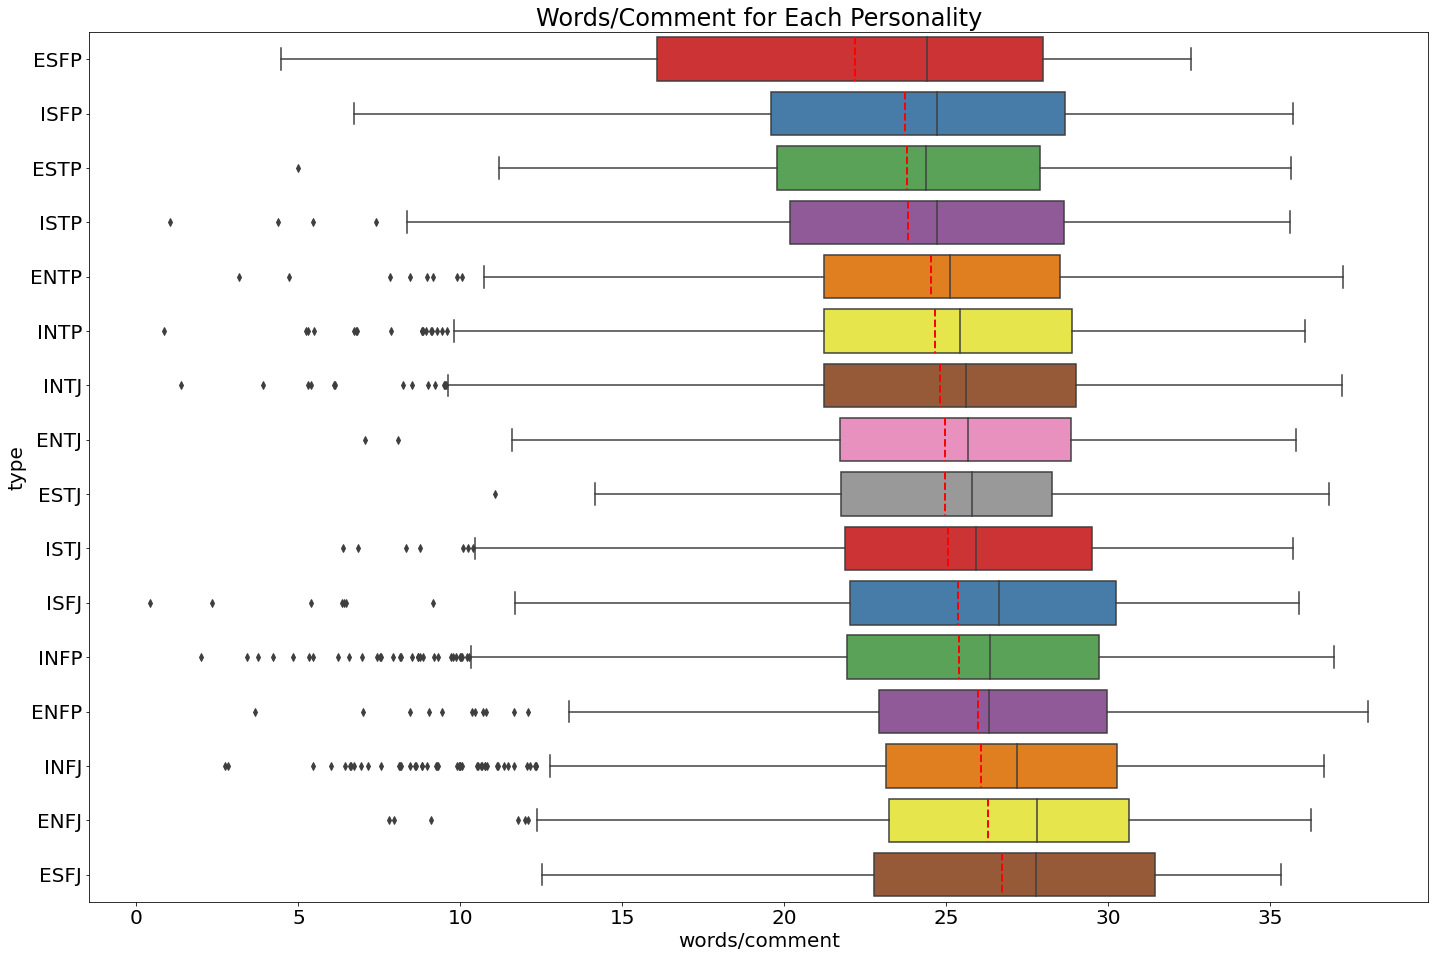

In [31]:
#seperate the upper figure into 2 figures(1)
plt.figure(figsize=(24,16))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('axes', labelsize=20) 
plt.rc('axes', titlesize=20) 
plt.rc('legend', fontsize=20) 
sns.boxplot( x='words/comment',y='type', data=df, showmeans=True, meanline=True, meanprops={'linestyle':'--','color':'red','linewidth':2},
            order=sorted_mean.index,
            palette='Set1').set_title('Words/Comment for Each Personality',fontsize=24)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; yo

Text(0.5, 1.0, 'Words/Comment for Each Personality')

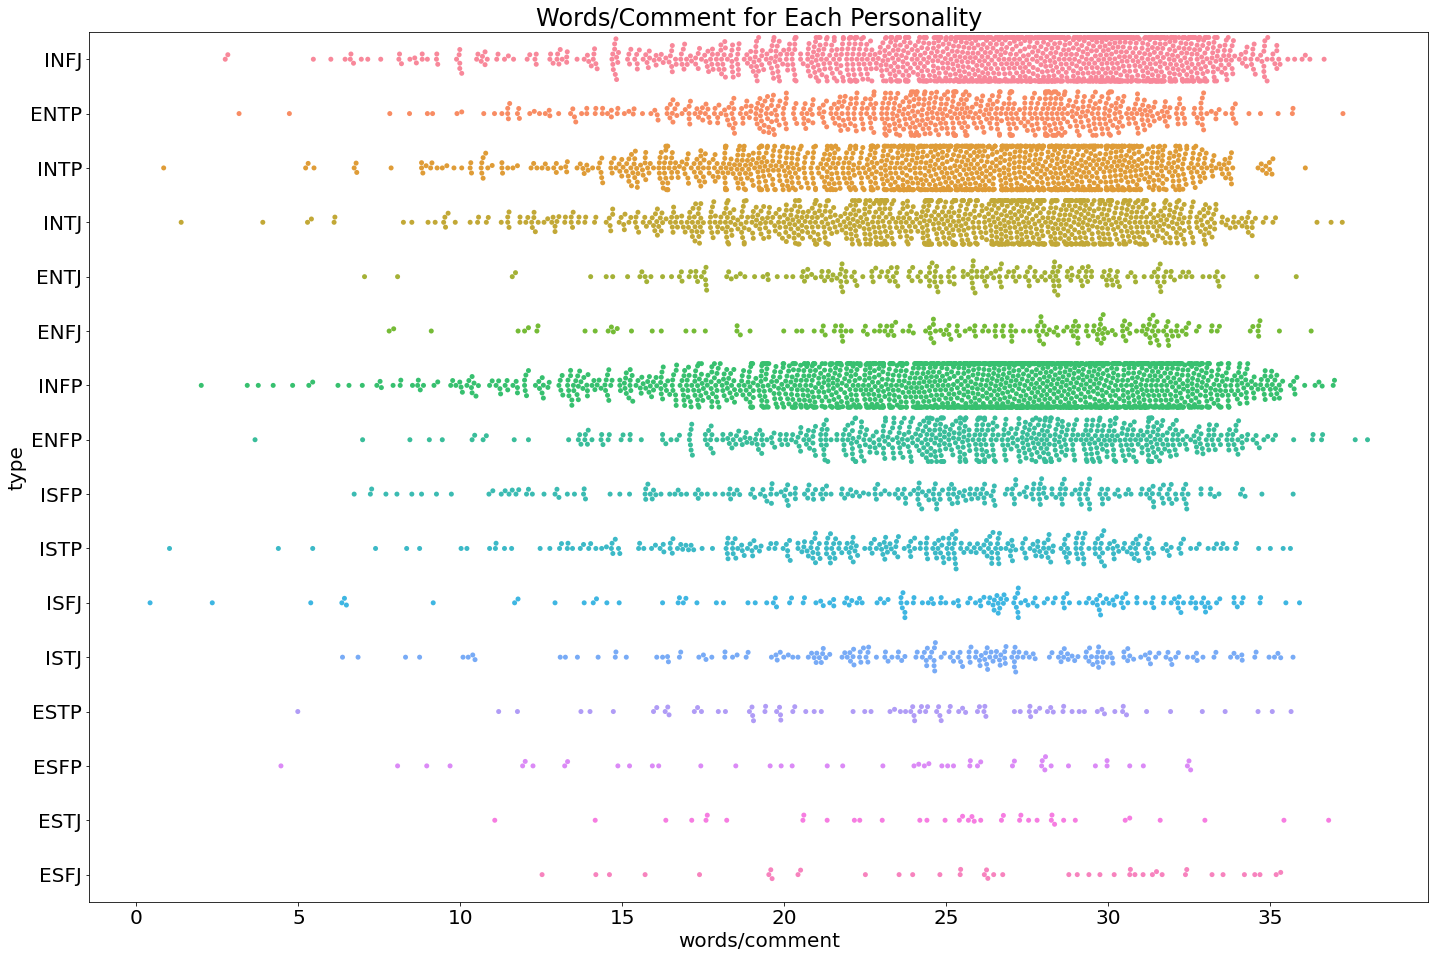

In [32]:
#seperate the upper figure into 2 figures(2)
plt.figure(figsize=(24,16))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('axes', labelsize=20) 
plt.rc('axes', titlesize=20) 
plt.rc('legend', fontsize=20)
sns.swarmplot(y='type', x='words/comment', data=df).set_title('Words/Comment for Each Personality',fontsize=24)

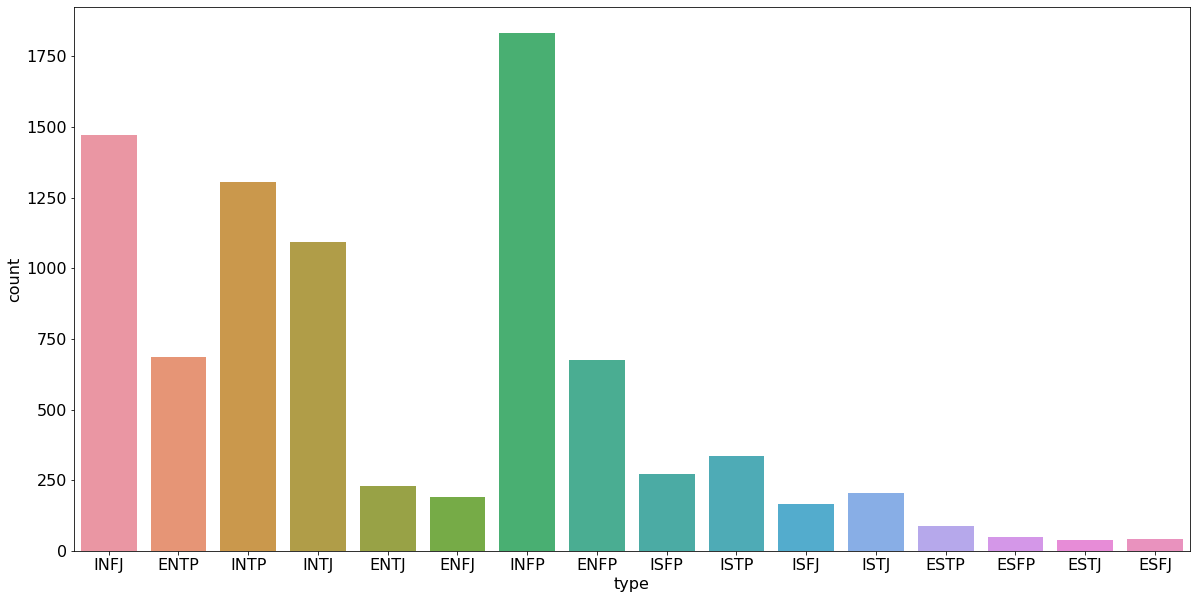

In [33]:
plt.figure(figsize=(20,10))
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Personality Types', fontsize=16)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
sns.countplot(data=df, x='type')

#sns.countplot(cnt_srs.index, cnt_srs.values)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


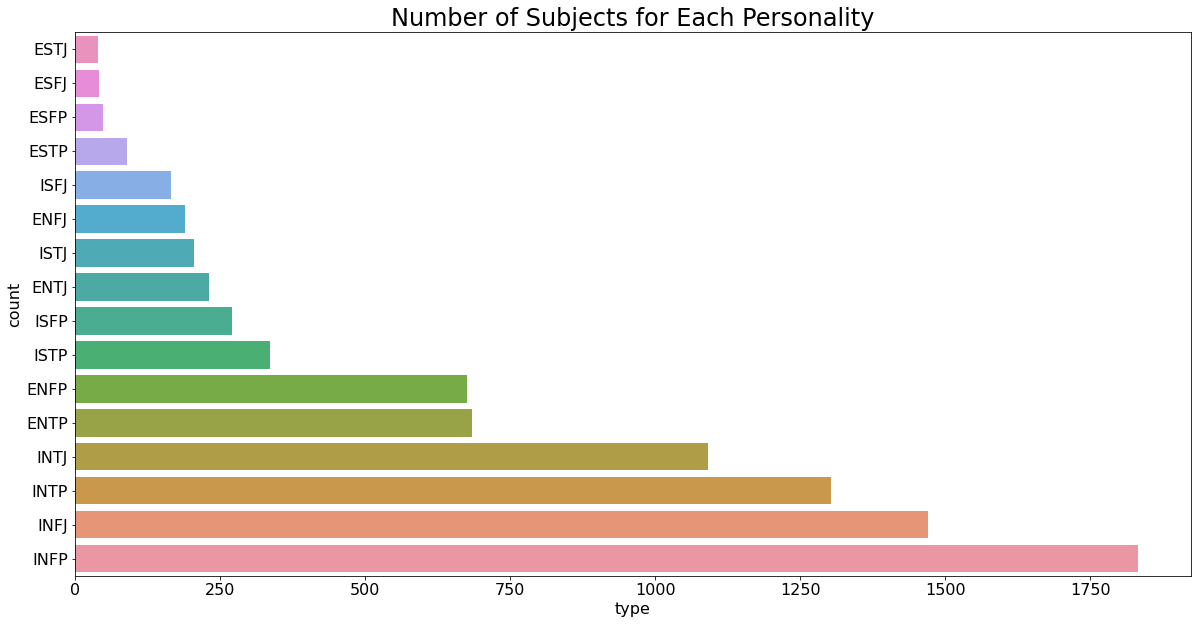

In [34]:
#df = pd.read_csv('/kaggle/input/mbti-type/mbti_1.csv')
# train = pd.read_csv('../input/mbti-type/mbti_1.csv')
mbti = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}
plt.figure(figsize=(20,10))
sns.barplot(cnt_srs.values, cnt_srs.index)
plt.gca().invert_yaxis()
plt.ylabel('count', fontsize=16)
plt.xlabel('type', fontsize=16)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.title('Number of Subjects for Each Personality',fontsize=24)
plt.show()

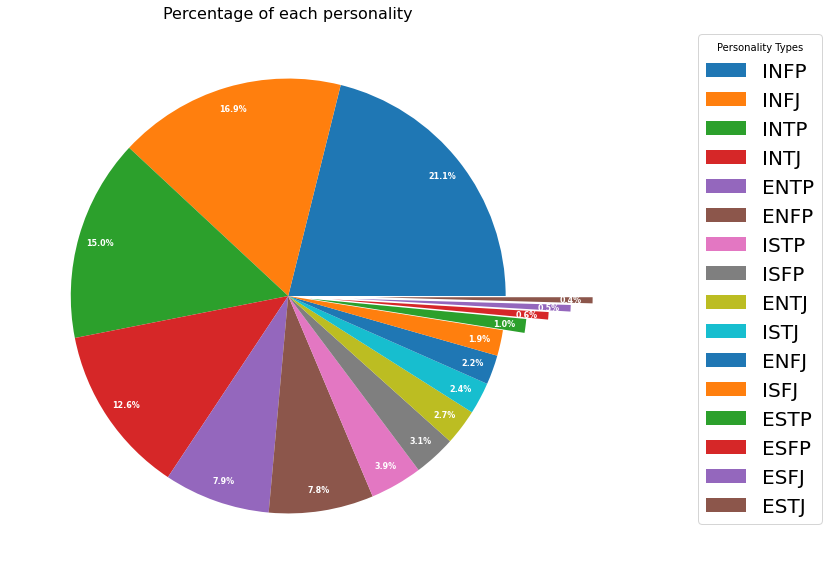

In [35]:

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))
data = cnt_srs.values
ingredients = cnt_srs.index
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)
#wedges, texts, autotexts = ax.pie(data, labels=cnt_srs.index,autopct=lambda pct: func(pct, data),
 #                                 textprops=dict(color="w"),pctdistance=0.9,
  #                                explode=(0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.2,0.3,0.4))
wedges, texts, autotexts = ax.pie(data, labels=cnt_srs.values,autopct='%1.1f%%',
                                  textprops=dict(color="w"),pctdistance=0.9,
                                  explode=(0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.2,0.3,0.4))
ax.legend(wedges, ingredients,
          title="Personality Types",
          #loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8,weight="bold")
ax.set_title("Percentage of each personality",size=16)
plt.show()